In [15]:
#libraries
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
import tensorflow as tf

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
#init.py
import json
words = []
classes = []
documents = []
ignore_words = ['?', '!']
intents = json.loads(open('intents.json').read())
kaggle_intents = json.loads(open('kaggle_intent.json').read())
c_intents = json.loads(open('complete_intents.json').read())

In [17]:
#words.py
words = []
documents = []
classes = []
#print(f'words.py {len(words)}')
# for intent in intents['intents']:
#     for pattern in intent['patterns']:

#         w = nltk.word_tokenize(pattern)
#         words.extend(w)
#         documents.append((w, intent['tag']))

#         if intent['tag'] not in classes:
#             classes.append(intent['tag'])

#This is where the kaggle_dataset is implemented. Remove this if we do not want to train with it.
for intent in c_intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        
        if intent['tag'] not in classes:
            classes.append(intent['tag'])


In [60]:
#get columns from tag type
cols = ['Patterns']
for intent in c_intents['intents']:
    if intent['tag'] not in cols: cols.append(intent['tag'])

df = pd.DataFrame(columns=cols)
for intent in c_intents['intents']:
    for phrase in intent['patterns']:
        df2 = {'Patterns': phrase, intent['tag']: 1}
        df = df.append(df2, ignore_index = True)
df = df.fillna(0)

In [61]:
df

,Patterns,greeting,goodbye,thanks,noanswer,options,about,name,help,complaint,commerce,customer,cloud,service,sales,hr/employee
0,Wie Ghets,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hi there,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,How are you,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Is anyone there?,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hey,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,I want to raise a complaint,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
122,there is a complaint about a service,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
123,have a complaint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
124,I want to raise a complaint,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
len(df)

126

In [57]:
df

,Patterns,greeting,goodbye,thanks,noanswer,options,about,name,help,complaint,commerce,customer,cloud,service,sales,hr/employee
0,Wie Ghets,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hi there,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,How are you,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Is anyone there?,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hey,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,I want to raise a complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
122,there is a complaint about a service,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
123,have a complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124,I want to raise a complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [23]:
#encode
df = pd.DataFrame(columns=['Patterns', 'Tag'])
for intent in c_intents['intents']:
    for pattern in intent['patterns']:
        for p in pattern['patterns']:
            df.append(p,)


{'tag': 'greeting',
 'patterns': ['Wie Ghets',
  'Hi there',
  'How are you',
  'Is anyone there?',
  'Hey',
  'Hola',
  'Hello',
  'Good day',
  "What's up"],
 'responses': ['Hello, thanks for asking',
  'Good to see you again',
  'Hi there, how can I help?'],
 'context': ['']}

In [4]:
#train_init
from sklearn.model_selection import train_test_split

# initializing training data
training = []

output_empty = [0] * len(classes)
for doc in documents:
    
    # initializing bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    #print(len(words))
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
#train_x = list(training[:,0])
#train_y = list(training[:,1])

X = list(training[:,0])
y = list(training[:,1])
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.33, random_state=42)


print("Training data created")

Training data created


In [18]:
#Experimental encoderC
VOCAB_SIZE = 1000
encoderC = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE)
encoderC.adapt(pd.Series(train_x).map(lambda text, label:text))

TypeError: <lambda>() missing 1 required positional argument: 'label'

In [14]:
#Train.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation, Dropout

# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1, validation_data=(test_x, test_y))
model.save('chatbot_model.h5', hist)

print("model created")

Epoch 1/200
17/17 [==============================] - 0s 10ms/step - loss: 2.6360 - accuracy: 0.2143 - val_loss: 2.3622 - val_accuracy: 0.2619
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 2.5824 - accuracy: 0.2500 - val_loss: 2.2414 - val_accuracy: 0.2143
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 2.3817 - accuracy: 0.2738 - val_loss: 2.1636 - val_accuracy: 0.3095
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 2.1242 - accuracy: 0.3333 - val_loss: 2.0323 - val_accuracy: 0.3333
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 2.0261 - accuracy: 0.3571 - val_loss: 2.0883 - val_accuracy: 0.2857
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 1.8722 - accuracy: 0.3690 - val_loss: 1.7484 - val_accuracy: 0.3095
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 1.7529 - accuracy: 0.4405 - val_loss: 1.7271 - val_accuracy: 0.4048
Epoch 8/200


In [10]:
#Bi_model
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

bi_model = Sequential()
bi_model.add(Embedding(input_dim=len(train_x[0]), output_dim=64))
bi_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
bi_model.add(Dense(64, activation='relu'))
bi_model.add(Dense(len(train_y[0]), activation='softmax'))

bi_model.compile(optimizer=Adam(1e-4),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=['accuracy'])

history = bi_model.fit(np.array(train_x),np.array(train_y),
                       epochs=10,
                       batch_size=5,
                       validation_data=(test_x,test_y),
                       #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
                       )

bi_model.save('bi_chatbot_model.h5', history)

Epoch 1/10
17/17 [==============================] - 4s 219ms/step - loss: 2.6407 - accuracy: 0.0476 - val_loss: 2.6461 - val_accuracy: 0.0476
Epoch 2/10
17/17 [==============================] - 3s 157ms/step - loss: 2.6343 - accuracy: 0.1548 - val_loss: 2.6427 - val_accuracy: 0.1667
Epoch 3/10
17/17 [==============================] - 3s 155ms/step - loss: 2.6303 - accuracy: 0.2024 - val_loss: 2.6412 - val_accuracy: 0.1667
Epoch 4/10
17/17 [==============================] - 2s 123ms/step - loss: 2.6246 - accuracy: 0.1905 - val_loss: 2.6387 - val_accuracy: 0.1429
Epoch 5/10
17/17 [==============================] - 2s 123ms/step - loss: 2.6180 - accuracy: 0.1667 - val_loss: 2.6361 - val_accuracy: 0.1190
Epoch 6/10
17/17 [==============================] - 2s 123ms/step - loss: 2.6106 - accuracy: 0.1548 - val_loss: 2.6324 - val_accuracy: 0.1190
Epoch 7/10
17/17 [==============================] - 2s 122ms/step - loss: 2.5989 - accuracy: 0.1548 - val_loss: 2.6258 - val_accuracy: 0.1190
Epoch 

In [12]:
#Graph bidirectional
import pandas as pd
import matplotlib.pyplot as plt

def plot_model(model, history):
    test_loss, test_acc = model.evaluate(test_x,test_y)

    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))


    history.history
    hist_df = pd.DataFrame(history.history)

    losses = history.history['loss']
    accs = history.history['accuracy']
    val_losses = history.history['val_loss']
    val_accs = history.history['val_accuracy']
    epochs = len(losses)

    plt.figure(figsize=(16, 4))
    for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
        plt.subplot(1, 2, i + 1)
        plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
        plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
        plt.legend()
    plt.show()

2/2 [==============================] - 0s 1000us/step - loss: 2.4157 - accuracy: 0.5238
Test Loss: 2.41568922996521
Test Accuracy: 0.523809552192688


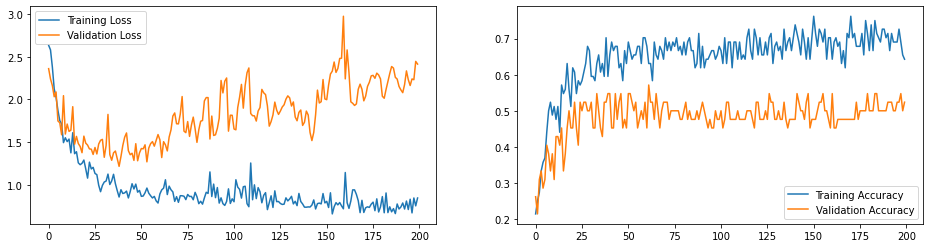

In [15]:
#plot single layer model
plot_model(model, hist)

2/2 [==============================] - 0s 13ms/step - loss: 2.5293 - accuracy: 0.1190
Test Loss: 2.529291868209839
Test Accuracy: 0.1190476194024086


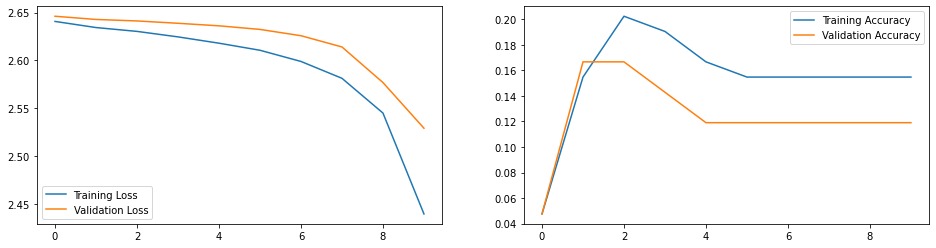

In [13]:
#plot bidirectional model
plot_model(bi_model, history)

In [18]:
model = tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim=len(train_x[0])
                              ,output_dim=64
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.LSTM(64, return_sequences=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
                              ,tf.keras.layers.LSTM(64, return_sequences=False)
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dropout(0.2)
                              ,tf.keras.layers.Dense(len(train_y[0]),activation='softmax')   # num_classes = 4
                             ])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy() # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              ,metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          31104     
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
bidirectional_5 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 14)               

In [6]:
!pip install tensorflow_hub
!pip install --upgrade tensorflow-estimator==2.3.0

  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have scipy 1.7.1 which is incompatible.


In [11]:
from tensorflow_estimator.python.estimator.canned.dnn import dnn_logit_fn_builder
import tensorflow_hub as hub

ImportError: cannot import name 'dnn_logit_fn_builder' from partially initialized module 'tensorflow_estimator.python.estimator.canned.dnn' (most likely due to a circular import) (C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow_estimator\python\estimator\canned\dnn.py)

In [8]:
#import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)

NameError: name 'hub' is not defined

In [3]:
#@title Load the Universal Sentence Encoder's TF Hub module
from absl import logging

import tensorflow as tf


import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

ImportError: cannot import name 'parameter_server_strategy_v2' from 'tensorflow.python.distribute' (C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\distribute\__init__.py)

In [16]:
three_model = tf.keras.Sequential([
                              tf.keras.layers.Embedding(input_dim=len(train_x[0])
                              ,output_dim=64
                                # Use masking to handle the variable sequence lengths
                              ,mask_zero=True)
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
                              ,tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))
                              ,tf.keras.layers.Dense(64, activation='relu')
                              ,tf.keras.layers.Dense(len(train_y[0]),activation='softmax')   # num_classes = 4
                             ])

three_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4)
              ,loss='categorical_crossentropy',
              # if we set from_logits=True we don not have specify a softmax activation function in the last layer
              metrics=['accuracy'])

hist = three_model.fit(np.array(train_x),
    epochs = 10,
    validation_data=(test_x,test_y),
    #callbacks=[tf.keraas.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )





Epoch 1/10


ValueError: in user code:

    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        _minimize(self.distribute_strategy, tape, self.optimizer, loss,
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\engine\training.py:2736 _minimize
        gradients = optimizer._aggregate_gradients(zip(gradients,  # pylint: disable=protected-access
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:562 _aggregate_gradients
        filtered_grads_and_vars = _filter_grads(grads_and_vars)
    C:\Users\joshu\anaconda3\envs\msds\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:1270 _filter_grads
        raise ValueError("No gradients provided for any variable: %s." %

    ValueError: No gradients provided for any variable: ['embedding_2/embeddings:0', 'bidirectional_2/forward_lstm_2/lstm_cell_7/kernel:0', 'bidirectional_2/forward_lstm_2/lstm_cell_7/recurrent_kernel:0', 'bidirectional_2/forward_lstm_2/lstm_cell_7/bias:0', 'bidirectional_2/backward_lstm_2/lstm_cell_8/kernel:0', 'bidirectional_2/backward_lstm_2/lstm_cell_8/recurrent_kernel:0', 'bidirectional_2/backward_lstm_2/lstm_cell_8/bias:0', 'bidirectional_3/forward_lstm_3/lstm_cell_10/kernel:0', 'bidirectional_3/forward_lstm_3/lstm_cell_10/recurrent_kernel:0', 'bidirectional_3/forward_lstm_3/lstm_cell_10/bias:0', 'bidirectional_3/backward_lstm_3/lstm_cell_11/kernel:0', 'bidirectional_3/backward_lstm_3/lstm_cell_11/recurrent_kernel:0', 'bidirectional_3/backward_lstm_3/lstm_cell_11/bias:0', 'bidirectional_4/forward_lstm_4/lstm_cell_13/kernel:0', 'bidirectional_4/forward_lstm_4/lstm_cell_13/recurrent_kernel:0', 'bidirectional_4/forward_lstm_4/lstm_cell_13/bias:0', 'bidirectional_4/backward_lstm_4/lstm_cell_14/kernel:0', 'bidirectional_4/backward_lstm_4/lstm_cell_14/recurrent_kernel:0', 'bidirectional_4/backward_lstm_4/lstm_cell_14/bias:0', 'dense_7/kernel:0', 'dense_7/bias:0', 'dense_8/kernel:0', 'dense_8/bias:0'].
